# Business Case: Yulu - Hypothesis Testing

## About Yulu 
<img src="https://cdn.dribbble.com/users/610297/screenshots/6662102/yulu-brand-identity.gif" width=20%>

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

## How you can help here?

**The company wants to know:**

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
2. How well those variables describe the electric cycle demands

##### Importing libraries 

In [10]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin
import warnings
warnings.filterwarnings("ignore")
sns.set_palette('rocket')

In [11]:
# importing datasets
df = pd.read_csv('data/yulu_bike_sharing_dataset.csv', parse_dates=['datetime'])
display(df.head())
display(df.info())
display(df.describe())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


None

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


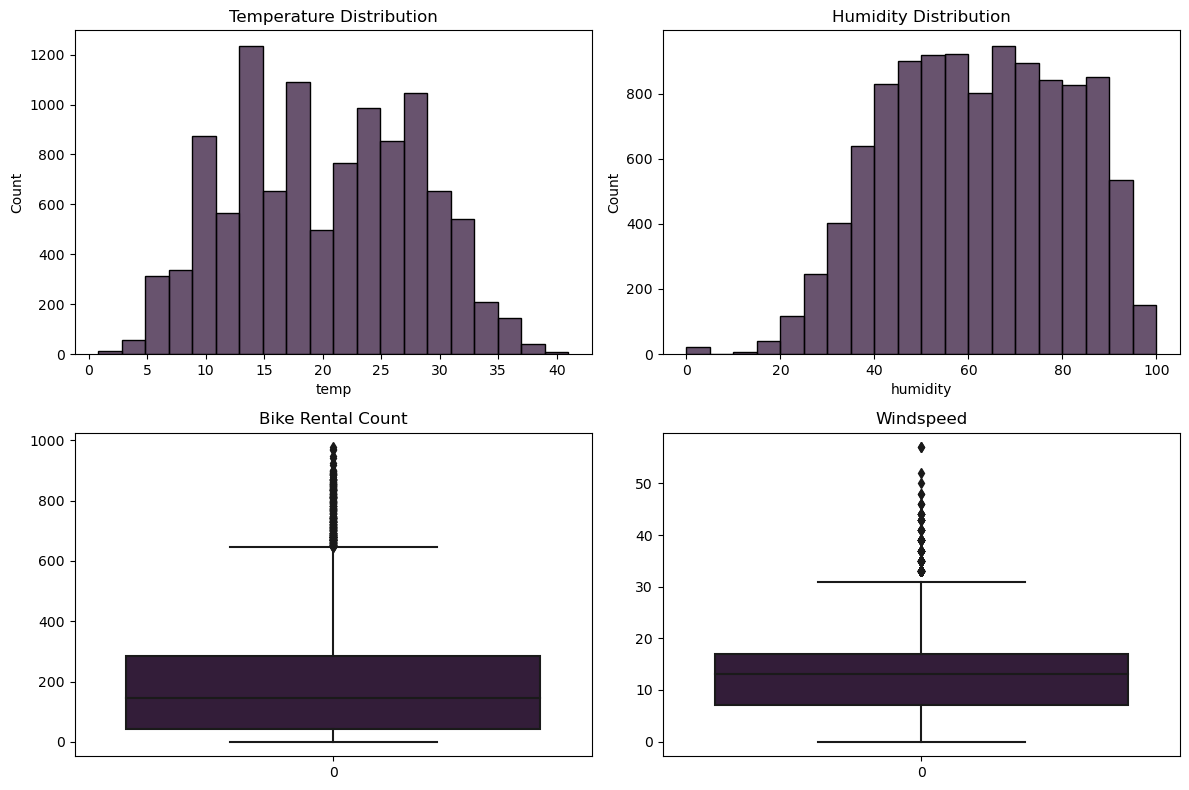

In [12]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot histograms
sns.histplot(df['temp'], bins=20, ax=axes[0, 0])
axes[0, 0].set_title('Temperature Distribution')

sns.histplot(df['humidity'], bins=20, ax=axes[0, 1])
axes[0, 1].set_title('Humidity Distribution')

# Plot boxplots
sns.boxplot(df['count'], ax=axes[1, 0])
axes[1, 0].set_title('Bike Rental Count')

sns.boxplot(df['windspeed'], ax=axes[1, 1])
axes[1, 1].set_title('Windspeed')

plt.tight_layout()
plt.show()

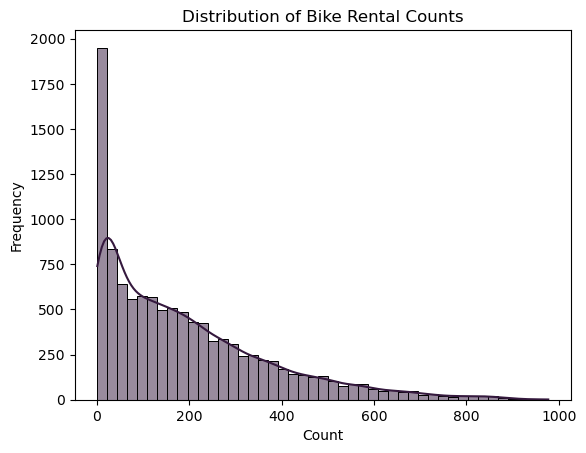

In [13]:
# Distribution of numerical variables
sns.histplot(df['count'], kde=True)
plt.title('Distribution of Bike Rental Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

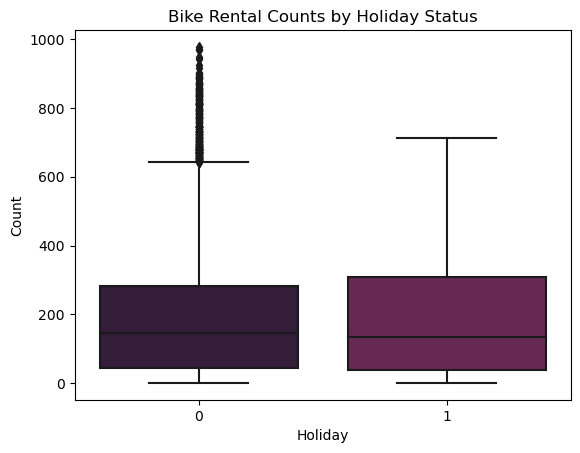

In [14]:
# Boxplot of categorical variables
sns.boxplot(x='holiday', y='count', data=df)
plt.title('Bike Rental Counts by Holiday Status')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()

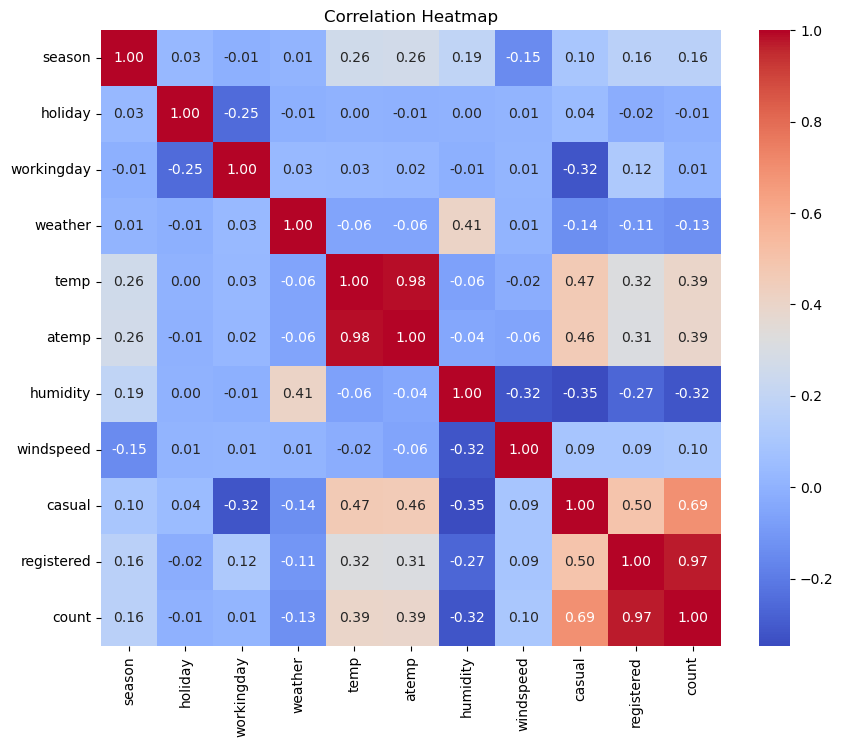

In [15]:
# Remove unnecessary columns
columns_to_exclude = ['datetime']  # Add other columns you want to exclude
df_correlation = df.drop(columns=columns_to_exclude)

# Calculate correlation matrix
corr_matrix = df_correlation.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

* **Strong positive correlations:**
    * temp & atemp (expected)
    * casual & registered riders
    * registered riders & total trip count
* **Moderate positive correlations:**
    * temp & total trip count (warmer = more rides)
    * atemp & total trip count (warmer = more rides)
    * humidity & casual ridership (needs further exploration)
* **Weak correlations:**
    * Weather with ridership (unclear)
    * Temp & humidity (as expected)
* **Negligible correlations:**
    * Season with most features
    * Holidays with most features (except working day)
    * Working days with most features (except holidays)
    * Windspeed with most features

### Handling Outliers

In [16]:
print(df.shape)
Q1 = df['count'].quantile(0.25)
Q3 = df['count'].quantile(0.75)
IQR = Q3 - Q1
df=df[(df['count']>Q1 - (1.5*IQR)) & (df['count']<Q3 + (1.5*IQR))].copy()
print(df.shape)

(10886, 12)
(10583, 12)


# Hypothesis Testing:
## 1. Does working day has effect on number of electric cycles rented?
Let, H<sub>0</sub>: Working day has No effect on number of electric cycles rented<br>
and H<sub>1</sub>: Working day has effect on number of electric cycles rented<br>

In [29]:
from scipy import stats

# Separate the data into two groups: working days and non-working days
working_days = df[df['workingday'] == 1]['count']
non_working_days = df[df['workingday'] == 0]['count']

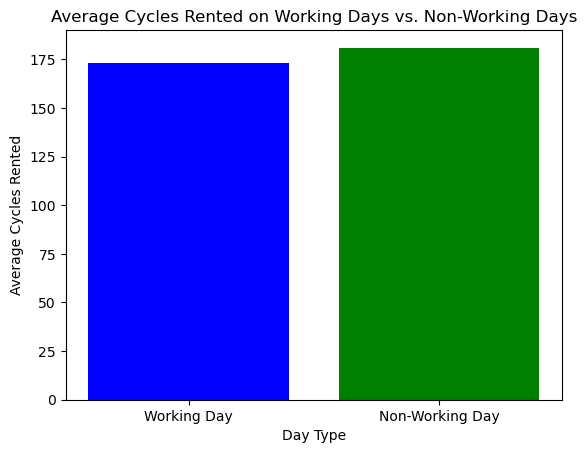

In [36]:
# Calculate average number of cycles rented on working days and non-working days
working_days_avg = df[df['workingday'] == 1]['count'].mean()
non_working_days_avg = df[df['workingday'] == 0]['count'].mean()

# Create bar plot
plt.bar(['Working Day', 'Non-Working Day'], [working_days_avg, non_working_days_avg], color=['blue', 'green'])
plt.xlabel('Day Type')
plt.ylabel('Average Cycles Rented')
plt.title('Average Cycles Rented on Working Days vs. Non-Working Days')
plt.show()


In [17]:
# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(working_days, non_working_days)

# Define the significance level
alpha = 0.05

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence to suggest that working day has an effect on the number of electric cycles rented.")
else:
    print("Fail to reject the null hypothesis. There is no evidence to suggest that working day has an effect on the number of electric cycles rented.")

T-statistic: -2.4512041726795246
P-value: 0.014253976221734492
Reject the null hypothesis. There is evidence to suggest that working day has an effect on the number of electric cycles rented.


### Hypothesis Testing Results:

- **T-statistic**: -2.45
- **P-value**: 0.0143

Based on the hypothesis test:

- **Conclusion**: Since the p-value (0.0143) is less than the significance level (0.05), we reject the null hypothesis. This suggests that there is evidence to suggest that working day has an effect on the number of electric cycles rented.

## 2. Does seasons has effect on number of electric cycles rented?
Let, H<sub>0</sub>: Seasons has No effect on number of electric cycles rented<br>
and H<sub>1</sub>: Seasons has effect on number of electric cycles rented<br>

In [27]:
from scipy.stats import f_oneway, kruskal
import numpy as np

# Group the data by season and extract the counts
spring_counts = df[df['season'] == 1]['count']
summer_counts = df[df['season'] == 2]['count']
fall_counts = df[df['season'] == 3]['count']
winter_counts = df[df['season'] == 4]['count']

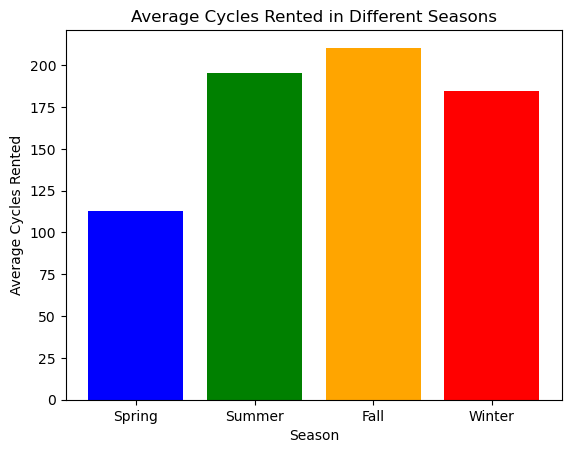

In [32]:
import matplotlib.pyplot as plt

# Calculate average number of cycles rented for each season
spring_avg = df[df['season'] == 1]['count'].mean()
summer_avg = df[df['season'] == 2]['count'].mean()
fall_avg = df[df['season'] == 3]['count'].mean()
winter_avg = df[df['season'] == 4]['count'].mean()

# Create bar plot
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
avg_counts = [spring_avg, summer_avg, fall_avg, winter_avg]

plt.bar(seasons, avg_counts, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Season')
plt.ylabel('Average Cycles Rented')
plt.title('Average Cycles Rented in Different Seasons')
plt.show()

In [22]:
# Check the assumptions for ANOVA
# Assumption 1: Normality
# Check if each group follows a normal distribution using Shapiro-Wilk test
shapiro_stat, shapiro_p_value = stats.shapiro(np.concatenate([spring_counts, summer_counts, fall_counts, winter_counts]))

# Assumption 2: Homogeneity of variances
# Check if the variances of the groups are equal using Levene's test
levene_stat, levene_p_value = stats.levene(spring_counts, summer_counts, fall_counts, winter_counts)

# Define the significance level
alpha = 0.05

# Perform ANOVA or Kruskal-Wallis based on assumptions
if shapiro_p_value > alpha and levene_p_value > alpha:
    # Use ANOVA
    f_statistic, p_value = f_oneway(spring_counts, summer_counts, fall_counts, winter_counts)
    print("Using ANOVA")
    print("F-statistic:", f_statistic)
    print("P-value:", p_value)
else:
    # Use Kruskal-Wallis
    k_statistic, p_value = kruskal(spring_counts, summer_counts, fall_counts, winter_counts)
    print("Using Kruskal-Wallis")
    print("K-statistic:", k_statistic)
    print("P-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence to suggest that the number of cycles rented differs across different seasons.")
else:
    print("Fail to reject the null hypothesis. There is no evidence to suggest that the number of cycles rented differs across different seasons.")

Using Kruskal-Wallis
K-statistic: 619.3679817851395
P-value: 6.376253250003707e-134
Reject the null hypothesis. There is evidence to suggest that the number of cycles rented differs across different seasons.


### Hypothesis Testing Results (Using Kruskal-Wallis):

- **K-statistic**: 619.37
- **P-value**: 6.38e-134

Based on the Kruskal-Wallis test:

- **Conclusion**: Since the p-value (6.38e-134) is much less than the significance level (alpha), we reject the null hypothesis. This suggests that there is strong evidence to suggest that the number of cycles rented differs across different seasons.

## 3. Does weathers has effect on number of electric cycles rented?
Let, H<sub>0</sub>: Weathers has No effect on number of electric cycles rented<br>
and H<sub>1</sub>: Weathers has effect on number of electric cycles rented<br>

In [28]:
from scipy.stats import f_oneway, kruskal
import numpy as np

# Group the data by weather and extract the counts
weather_1_counts = df[df['weather'] == 1]['count']
weather_2_counts = df[df['weather'] == 2]['count']
weather_3_counts = df[df['weather'] == 3]['count']
weather_4_counts = df[df['weather'] == 4]['count']

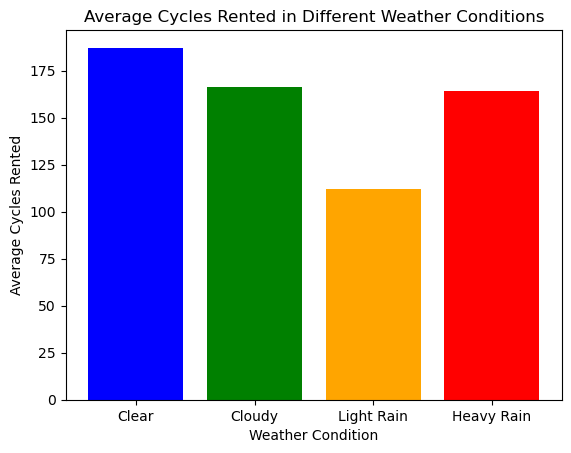

In [33]:
# Calculate average number of cycles rented for each weather condition
weather_1_avg = df[df['weather'] == 1]['count'].mean()
weather_2_avg = df[df['weather'] == 2]['count'].mean()
weather_3_avg = df[df['weather'] == 3]['count'].mean()
weather_4_avg = df[df['weather'] == 4]['count'].mean()

# Create bar plot
weather_conditions = ['Clear', 'Cloudy', 'Light Rain', 'Heavy Rain']
avg_counts = [weather_1_avg, weather_2_avg, weather_3_avg, weather_4_avg]

plt.bar(weather_conditions, avg_counts, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Weather Condition')
plt.ylabel('Average Cycles Rented')
plt.title('Average Cycles Rented in Different Weather Conditions')
plt.show()

In [23]:
# Check the assumptions for ANOVA
# Assumption 1: Normality
# Check if each group follows a normal distribution using Shapiro-Wilk test
shapiro_stat, shapiro_p_value = stats.shapiro(np.concatenate([weather_1_counts, weather_2_counts, weather_3_counts, weather_4_counts]))

# Assumption 2: Homogeneity of variances
# Check if the variances of the groups are equal using Levene's test
levene_stat, levene_p_value = stats.levene(weather_1_counts, weather_2_counts, weather_3_counts, weather_4_counts)

# Define the significance level
alpha = 0.05

# Perform ANOVA or Kruskal-Wallis based on assumptions
if shapiro_p_value > alpha and levene_p_value > alpha:
    # Use ANOVA
    f_statistic, p_value = f_oneway(weather_1_counts, weather_2_counts, weather_3_counts, weather_4_counts)
    print("Using ANOVA")
    print("F-statistic:", f_statistic)
    print("P-value:", p_value)
else:
    # Use Kruskal-Wallis
    k_statistic, p_value = kruskal(weather_1_counts, weather_2_counts, weather_3_counts, weather_4_counts)
    print("Using Kruskal-Wallis")
    print("K-statistic:", k_statistic)
    print("P-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence to suggest that the number of cycles rented differs across different weather conditions.")
else:
    print("Fail to reject the null hypothesis. There is no evidence to suggest that the number of cycles rented differs across different weather conditions.")


Using Kruskal-Wallis
K-statistic: 186.98317555232958
P-value: 2.7369378742733244e-40
Reject the null hypothesis. There is evidence to suggest that the number of cycles rented differs across different weather conditions.


### Hypothesis Testing Results (Using Kruskal-Wallis):

- **K-statistic**: 186.98
- **P-value**: 2.74e-40

Based on the Kruskal-Wallis test:

- **Conclusion**: Since the p-value (2.74e-40) is much less than the significance level (alpha), we reject the null hypothesis. This suggests that there is strong evidence to suggest that the number of cycles rented differs across different weather conditions.


## 4. Is weather dependent on season?
Let, H<sub>0</sub>: Weather and Season are two independent columns<br>
and H<sub>1</sub>: Weather and Season are two indifferent columns<br>

Here both the columns are categorical. So we can do a chi-square independence test.

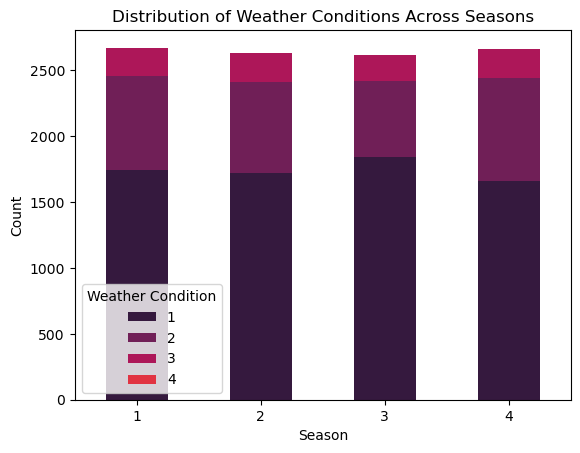

In [37]:
# Calculate the counts of each weather condition within each season
weather_season_counts = df.groupby(['season', 'weather']).size().unstack()

# Plot the stacked bar plot
weather_season_counts.plot(kind='bar', stacked=True)
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Distribution of Weather Conditions Across Seasons')
plt.xticks(rotation=0)
plt.legend(title='Weather Condition')
plt.show()


In [26]:
from scipy.stats import chi2_contingency

# Create a contingency table of observed frequencies
contingency_table = pd.crosstab(df['weather'], df['season'])

# Perform chi-square test of independence
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)

# Define the significance level
alpha = 0.05

# Print the results
print("Chi-square statistic:", chi2_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence to suggest that weather is dependent on season.")
else:
    print("Fail to reject the null hypothesis. There is no evidence to suggest that weather is dependent on season.")


Chi-square statistic: 47.16590591959627
P-value: 3.6550317439064896e-07
Reject the null hypothesis. There is evidence to suggest that weather is dependent on season.


### Hypothesis Testing Results (Chi-square Test of Independence):

- **Chi-square statistic**: 47.17
- **P-value**: 3.66e-07

Based on the chi-square test of independence:

- **Conclusion**: Since the p-value (3.66e-07) is much less than the significance level (alpha), we reject the null hypothesis. This suggests that there is evidence to suggest that weather is dependent on season.
